<a href="https://colab.research.google.com/github/Asia-NRI/Major-project/blob/main/Stock_Market_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive

In [12]:
#mount the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#read file from the drive
import pandas as pd

In [14]:
datasetpath='/content/MSFT_1986-03-13_2025-01-31.csv'

In [17]:
df=pd.read_csv(datasetpath)

In [18]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,13-03-1986,0.088542,0.101563,0.088542,0.097222,0.059827,1031788800
1,14-03-1986,0.097222,0.102431,0.097222,0.100694,0.061963,308160000
2,17-03-1986,0.100694,0.103299,0.100694,0.102431,0.063032,133171200
3,18-03-1986,0.102431,0.103299,0.098958,0.099826,0.061429,67766400
4,19-03-1986,0.099826,0.100694,0.097222,0.098090,0.060361,47894400
...,...,...,...,...,...,...,...
9793,24-01-2025,445.160004,446.649994,441.399994,444.059998,444.059998,15549500
9794,27-01-2025,424.010010,435.200012,423.500000,434.559998,434.559998,35647800
9795,28-01-2025,434.600006,448.380005,431.380005,447.200012,447.200012,23491700
9796,29-01-2025,446.690002,446.880005,440.399994,442.329987,442.329987,23581400


In [19]:
df.shape

(9798, 7)

In [20]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [21]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,13-03-1986,0.088542,0.101563,0.088542,0.097222,0.059827,1031788800
1,14-03-1986,0.097222,0.102431,0.097222,0.100694,0.061963,308160000
2,17-03-1986,0.100694,0.103299,0.100694,0.102431,0.063032,133171200
3,18-03-1986,0.102431,0.103299,0.098958,0.099826,0.061429,67766400
4,19-03-1986,0.099826,0.100694,0.097222,0.098090,0.060361,47894400


In [22]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9793,24-01-2025,445.160004,446.649994,441.399994,444.059998,444.059998,15549500
9794,27-01-2025,424.010010,435.200012,423.500000,434.559998,434.559998,35647800
9795,28-01-2025,434.600006,448.380005,431.380005,447.200012,447.200012,23491700
9796,29-01-2025,446.690002,446.880005,440.399994,442.329987,442.329987,23581400
9797,30-01-2025,418.769989,422.859985,413.160004,414.989990,414.989990,54405700


In [23]:
from matplotlib import pyplot as plt

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [25]:
import yfinance as yf
import pandas as pd


In [26]:
ticker_symbol = 'MSFT'
start_date = '1986-01-01'
end_date = '2025-12-31'

In [27]:
msft_data = yf.download(ticker_symbol, start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


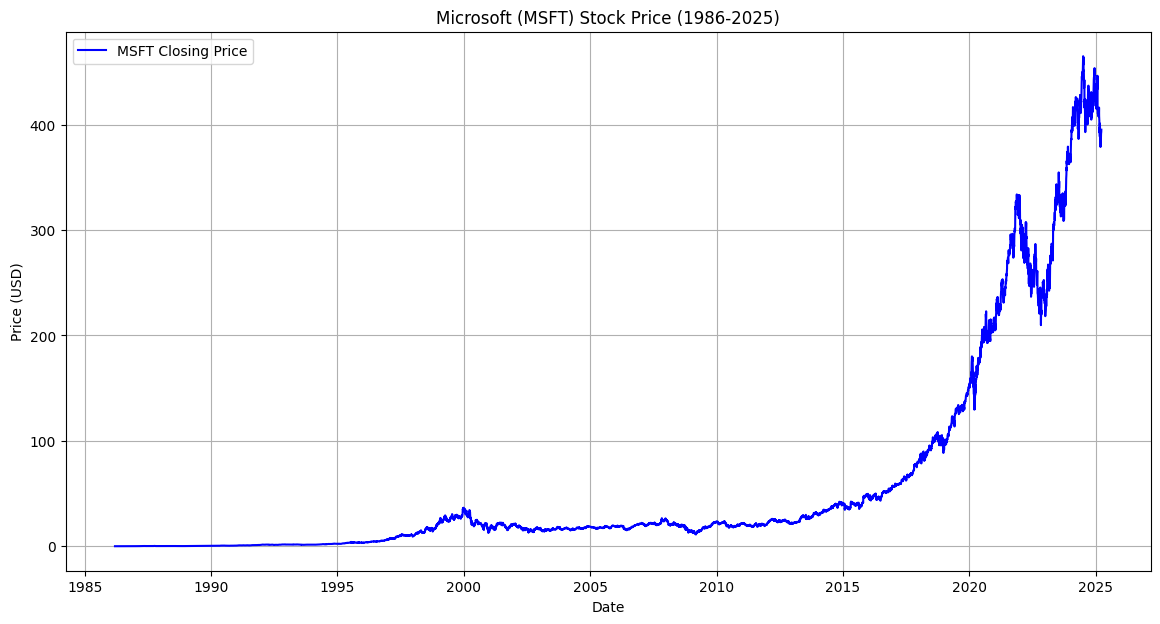

In [28]:
plt.figure(figsize=(14, 7))
plt.plot(msft_data['Close'], label='MSFT Closing Price', color='blue')
plt.title('Microsoft (MSFT) Stock Price (1986-2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


In [29]:
msft_monthly = msft_data['Close'].resample('M').mean()

<ipython-input-29-f53160634dc8>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  msft_monthly = msft_data['Close'].resample('M').mean()


In [30]:
print(msft_monthly.head())

Ticker          MSFT
Date                
1986-03-31  0.059130
1986-04-30  0.062918
1986-05-31  0.068313
1986-06-30  0.068376
1986-07-31  0.062942


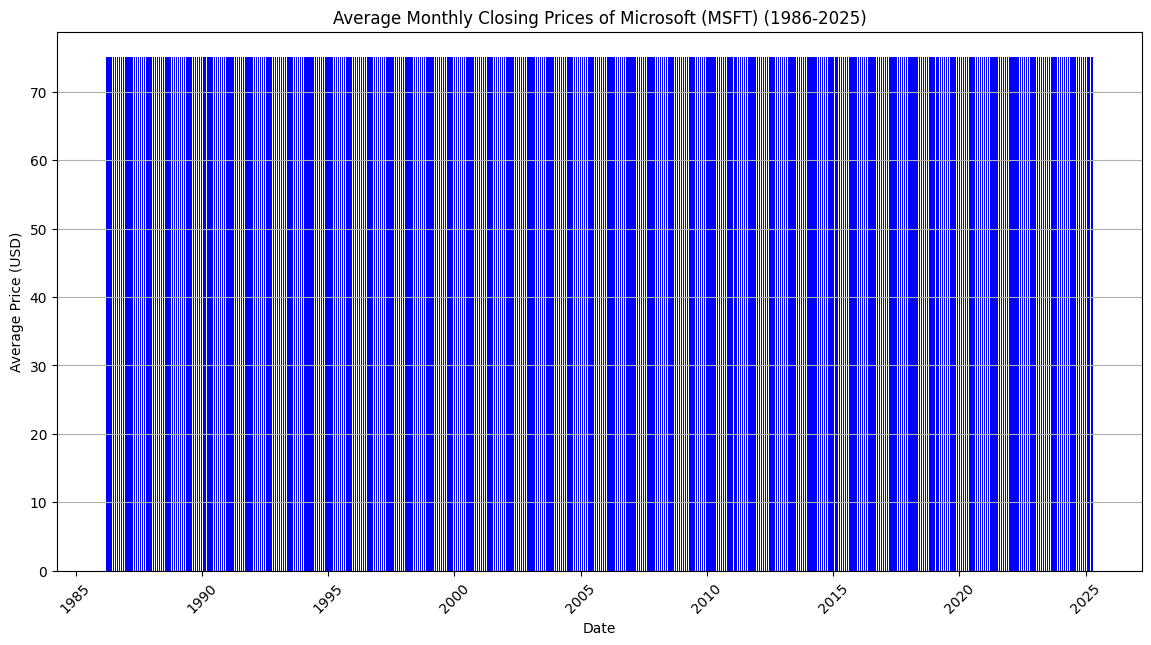

In [31]:
plt.figure(figsize=(14, 7))
plt.bar(msft_monthly.index, color='blue', height=75,width=20)   #Adjust width for better visibility
plt.title('Average Monthly Closing Prices of Microsoft (MSFT) (1986-2025)')
plt.xlabel('Date')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)   #Rotate x-axis labels for better visibility
plt.grid(axis='y')
plt.show()

In [32]:


 #Check for missing values
print(msft_data.isnull().sum())




Price   Ticker
Close   MSFT      0
High    MSFT      0
Low     MSFT      0
Open    MSFT      0
Volume  MSFT      0
dtype: int64


KeyError: 'Moving_Average'

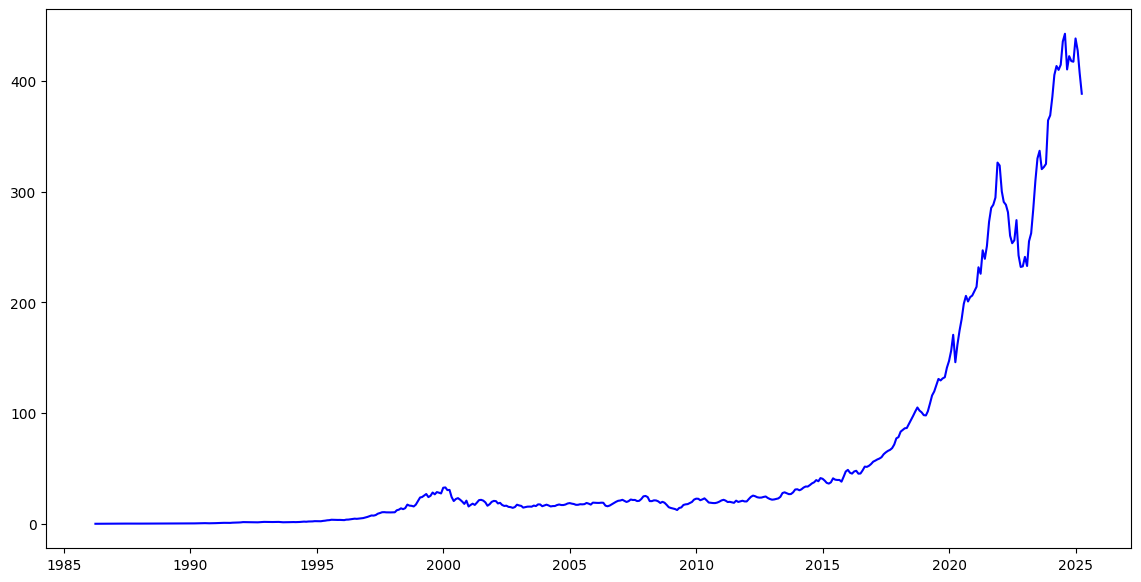

In [33]:
#Plotting the Average Monthly Closing Prices as a Line Graph
plt.figure(figsize=(14, 7))
plt.plot(msft_monthly.index, msft_monthly, color='blue', label='Monthly Avg Closing Price')
plt.bar(msft_monthly['Moving_Average'], color='orange', label='')
plt.title('Average Monthly Closing Prices of Microsoft (MSFT) (1986-2025)')
plt.xlabel('Date')
plt.ylabel('Average Price (USD)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


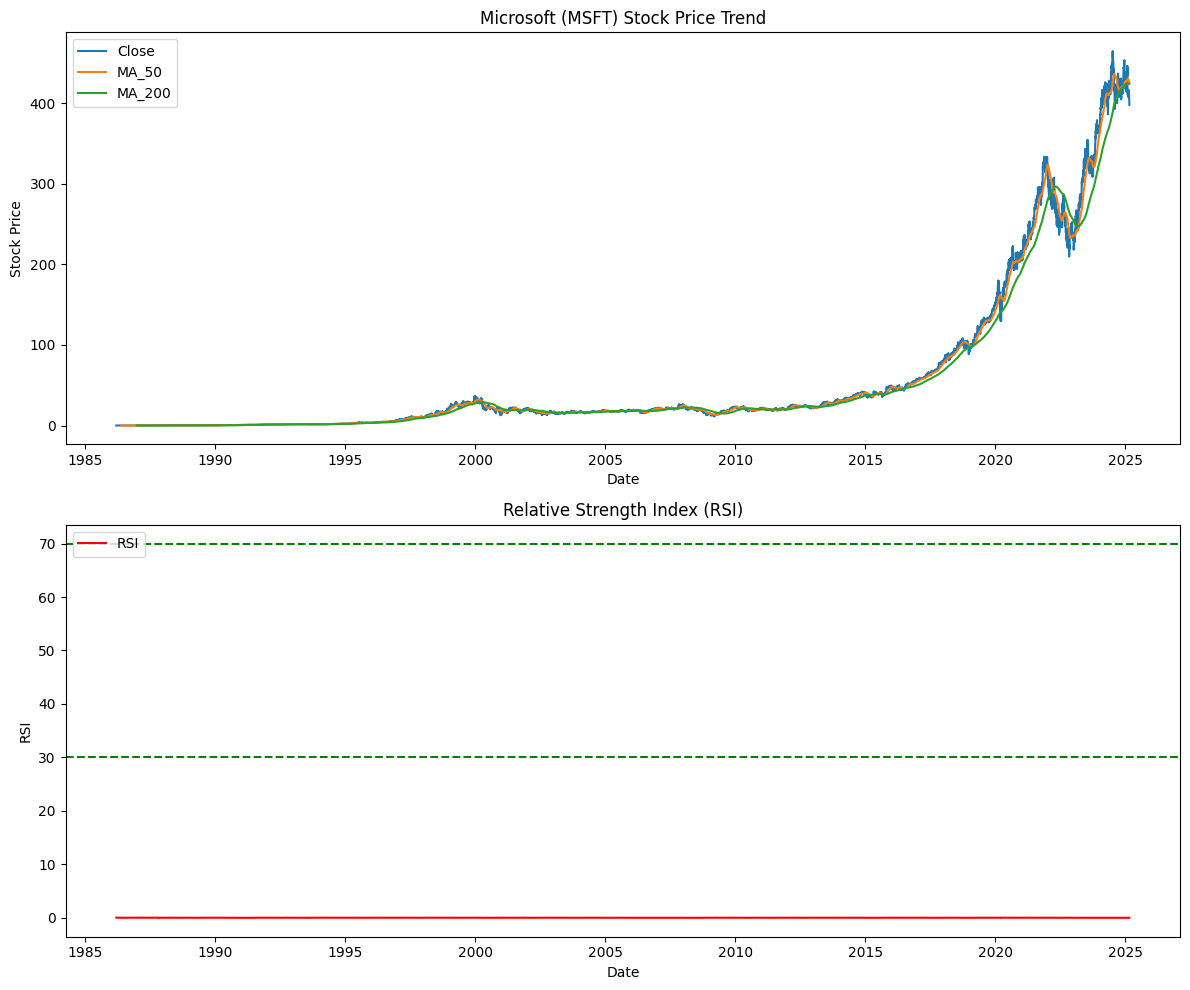

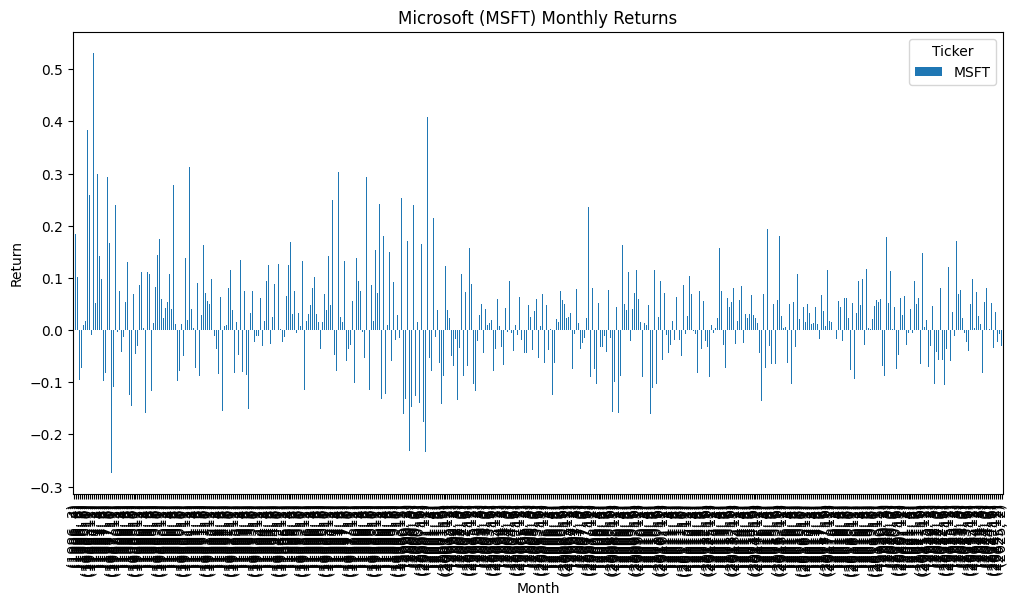

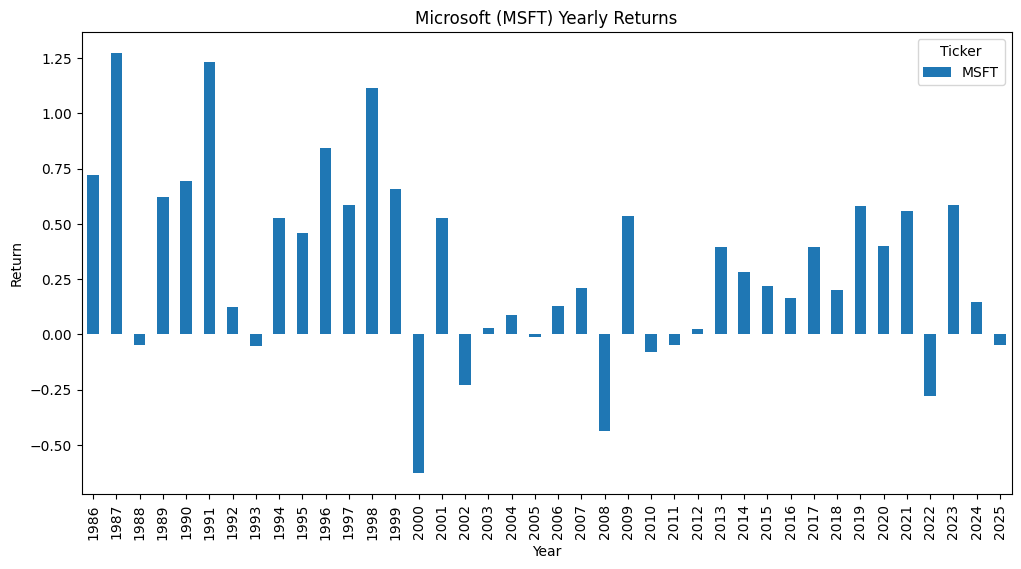

In [34]:


import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Download historical stock price data
data = yf.download('MSFT', start='1986-01-01', end='2025-02-26')

#Calculate moving averages
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()

#Calculate exponential moving averages
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA_200'] = data['Close'].ewm(span=200, adjust=False).mean()

#Calculate relative strength index (RSI)
data['RSI'] = data['Close'].pct_change().ewm(span=14, adjust=False).mean()

#Create a figure and axis object
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

#Plot the stock price data
ax[0].plot(data['Close'], label='Close')
ax[0].plot(data['MA_50'], label='MA_50')
ax[0].plot(data['MA_200'], label='MA_200')
ax[0].set_title('Microsoft (MSFT) Stock Price Trend')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Stock Price')
ax[0].legend(loc='upper left')

#Plot the RSI
ax[1].plot(data['RSI'], label='RSI', color='red')
ax[1].axhline(y=30, color='green', linestyle='--')
ax[1].axhline(y=70, color='green', linestyle='--')
ax[1].set_title('Relative Strength Index (RSI)')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('RSI')
ax[1].legend(loc='upper left')

#Show the plot
plt.tight_layout()
plt.show()

#Create a bar graph for monthly returns
data['Month'] = data.index.month
data['Year'] = data.index.year
monthly_returns = data.groupby(['Year', 'Month'])['Close'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0])
monthly_returns.plot(kind='bar', figsize=(12, 6))
plt.title('Microsoft (MSFT) Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Return')
plt.show()

#Create a bar graph for yearly returns
yearly_returns = data.groupby('Year')['Close'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0])
yearly_returns.plot(kind='bar', figsize=(12, 6))
plt.title('Microsoft (MSFT) Yearly Returns')
plt.xlabel('Year')
plt.ylabel('Return')
plt.show()




[*********************100%***********************]  1 of 1 completed


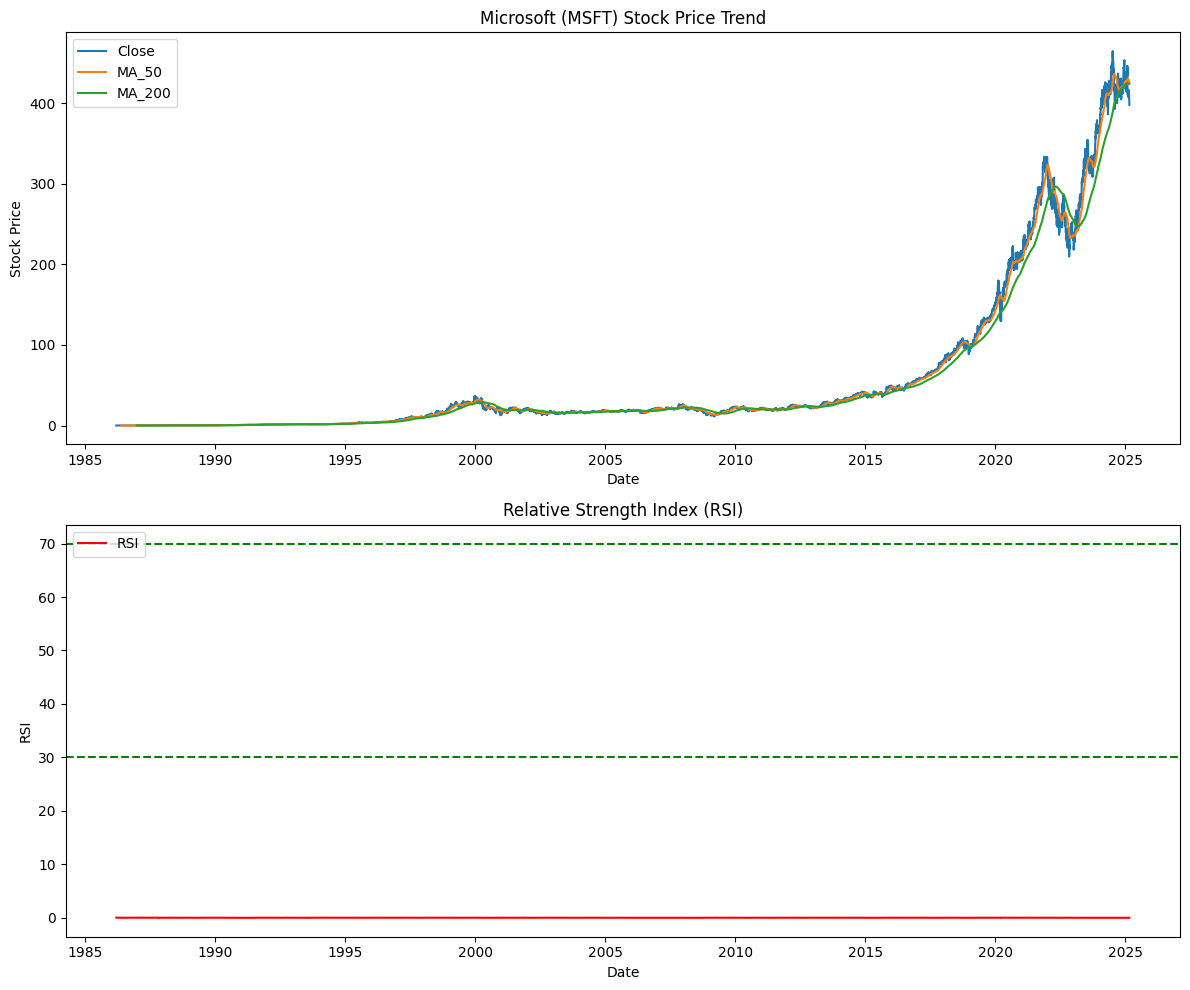

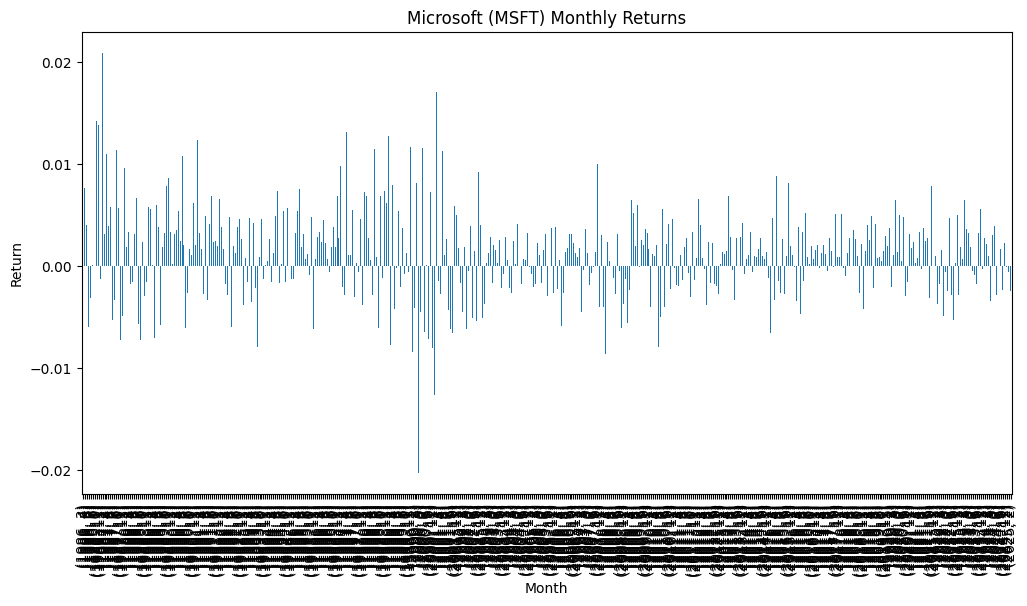

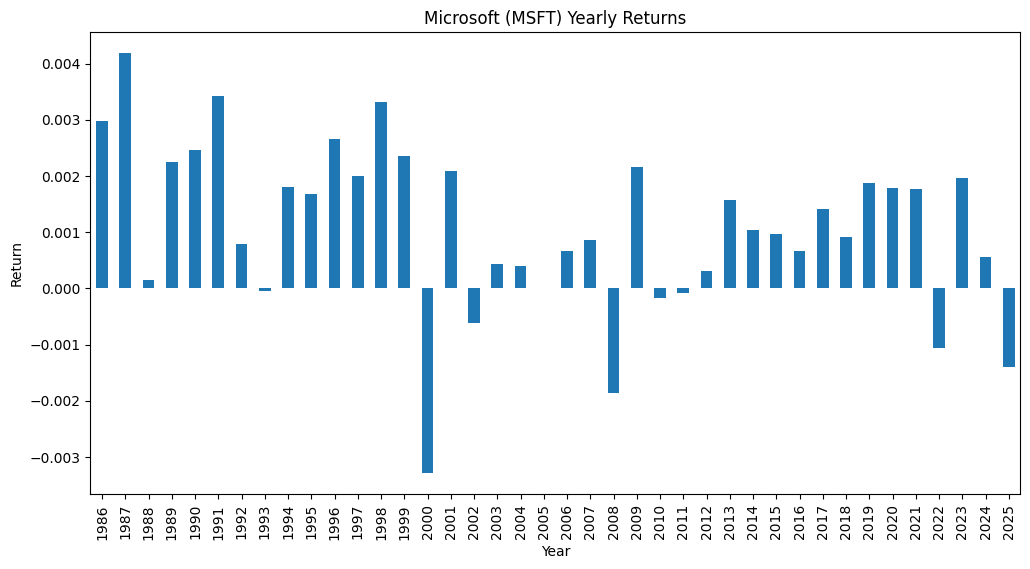

In [35]:


import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Download historical stock price data
data = yf.download('MSFT', start='1986-01-01', end='2025-02-26')

#Calculate daily returns
data['Return'] = data['Close'].pct_change()

#Calculate moving averages
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()

#Calculate exponential moving averages
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA_200'] = data['Close'].ewm(span=200, adjust=False).mean()

#Calculate relative strength index (RSI)
data['RSI'] = data['Return'].ewm(span=14, adjust=False).mean()

#Create a figure and axis object
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

#Plot the stock price data
ax[0].plot(data['Close'], label='Close')
ax[0].plot(data['MA_50'], label='MA_50')
ax[0].plot(data['MA_200'], label='MA_200')
ax[0].set_title('Microsoft (MSFT) Stock Price Trend')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Stock Price')
ax[0].legend(loc='upper left')

#Plot the RSI
ax[1].plot(data['RSI'], label='RSI', color='red')
ax[1].axhline(y=30, color='green', linestyle='--')
ax[1].axhline(y=70, color='green', linestyle='--')
ax[1].set_title('Relative Strength Index (RSI)')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('RSI')
ax[1].legend(loc='upper left')

#Show the plot
plt.tight_layout()
plt.show()

#Create a bar graph for monthly returns
data['Month'] = data.index.month
data['Year'] = data.index.year
monthly_returns = data.groupby(['Year', 'Month'])['Return'].mean()
monthly_returns.plot(kind='bar', figsize=(12, 6))
plt.title('Microsoft (MSFT) Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Return')
plt.show()

#Create a bar graph for yearly returns
yearly_returns = data.groupby('Year')['Return'].mean()
yearly_returns.plot(kind='bar', figsize=(12, 6))
plt.title('Microsoft (MSFT) Yearly Returns')
plt.xlabel('Year')
plt.ylabel('Return')
plt.show()




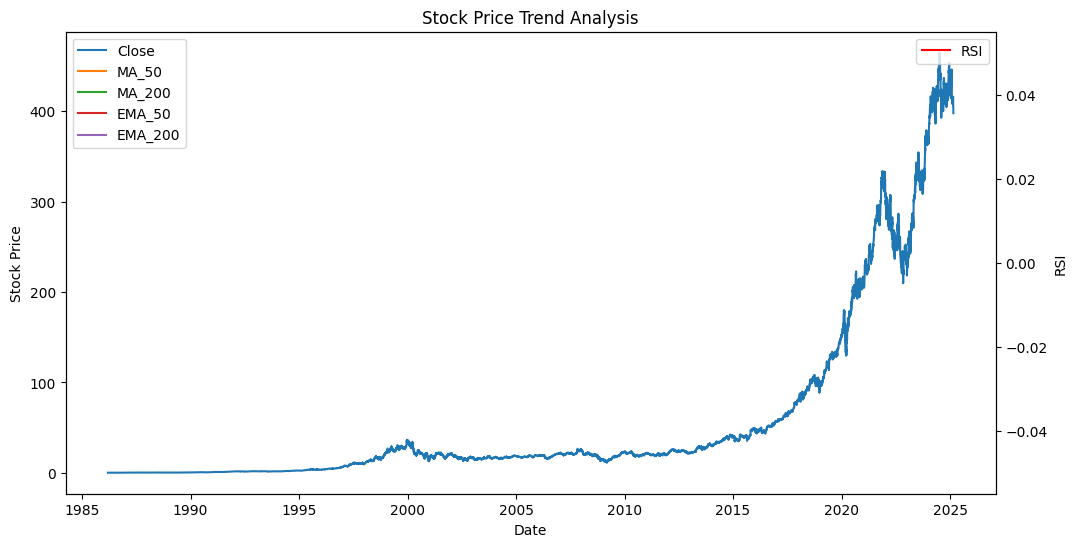

In [36]:


#Calculate moving averages
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()

#Calculate exponential moving averages
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA_200'] = data['Close'].ewm(span=200, adjust=False).mean()

#Calculate relative strength index (RSI)
data['RSI'] = data['Close'].pct_change().ewm(span=14, adjust=False).mean()

#Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

#Plot the stock price data
ax.plot(data['Close'], label='Close')

#Plot the moving averages
ax.plot(data['MA_50'], label='MA_50')
ax.plot(data['MA_200'], label='MA_200')

#Plot the exponential moving averages
ax.plot(data['EMA_50'], label='EMA_50')
ax.plot(data['EMA_200'], label='EMA_200')

#Plot the RSI
ax2 = ax.twinx()
ax2.plot(data['RSI'], label='RSI', color='red')

#Add title and labels
ax.set_title('Stock Price Trend Analysis')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax2.set_ylabel('RSI')

#Add legend
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

#Show the plot
plt.show()




[*********************100%***********************]  1 of 1 completed


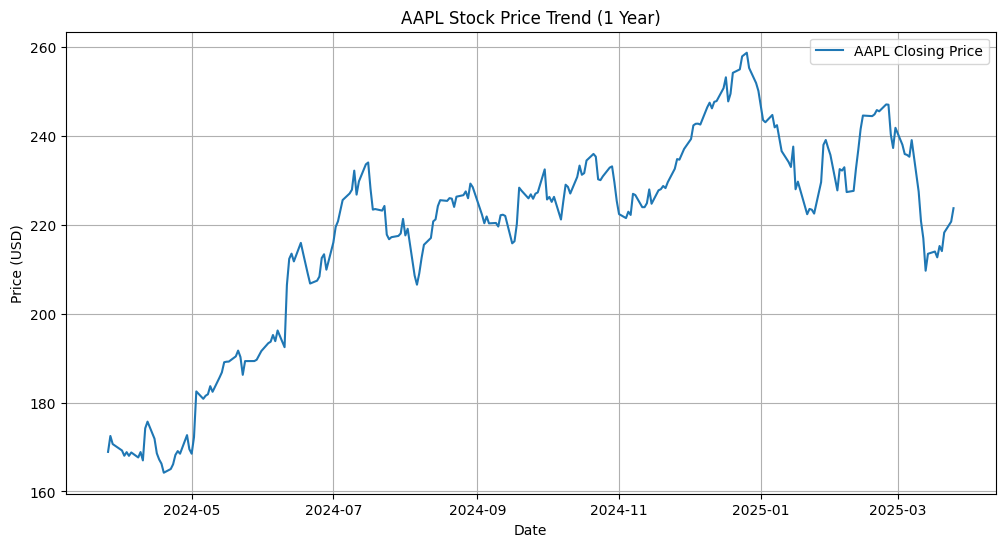

In [37]:
import yfinance as yf
import matplotlib.pyplot as plt

# 1. Get Stock Data
ticker = "AAPL"  # Example: Apple stock
data = yf.download(ticker, period="1y") # Get 1 year of data

# 2. Plot Closing Prices
plt.figure(figsize=(12, 6)) # Set figure size
plt.plot(data.index, data["Close"], label=f"{ticker} Closing Price") # Plot closing prices
plt.title(f"{ticker} Stock Price Trend (1 Year)") # Set title
plt.xlabel("Date") # Set x-axis label
plt.ylabel("Price (USD)") # Set y-axis label
plt.legend() # Show legend
plt.grid(True) # Add grid
plt.show() # Display the plot

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9798 non-null   object 
 1   Open       9798 non-null   float64
 2   High       9798 non-null   float64
 3   Low        9798 non-null   float64
 4   Close      9798 non-null   float64
 5   Adj Close  9798 non-null   float64
 6   Volume     9798 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 536.0+ KB


In [39]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9.798000e+03
mean,63.101853,63.740185,62.442524,63.115754,57.379106,5.631434e+07
std,98.564468,99.456502,97.608370,98.581311,98.594036,3.812324e+07
min,0.088542,0.092014,0.088542,0.090278,0.055554,2.304000e+06
25%,5.898438,5.976563,5.791016,5.876953,3.616455,3.141410e+07
50%,27.432500,27.770000,27.200001,27.490000,19.265326,4.947035e+07
75%,47.577501,48.127501,47.042500,47.590000,40.021119,7.028210e+07
max,467.000000,468.350006,464.459992,467.559998,465.786438,1.031789e+09


In [40]:
pd.DataFrame(df.isna().sum().reset_index(name='Na'))

,index,Na
0,Date,0
1,Open,0
2,High,0
3,Low,0
4,Close,0
5,Adj Close,0
6,Volume,0


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [42]:
X=df[['Low','High','Close']]
y=df['Volume']

In [43]:
print(X.dtypes)
print(y.dtypes)

Low      float64
High     float64
Close    float64
dtype: object
int64


In [44]:
num_cols=df.select_dtypes(include={'int64','float64'}).columns

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

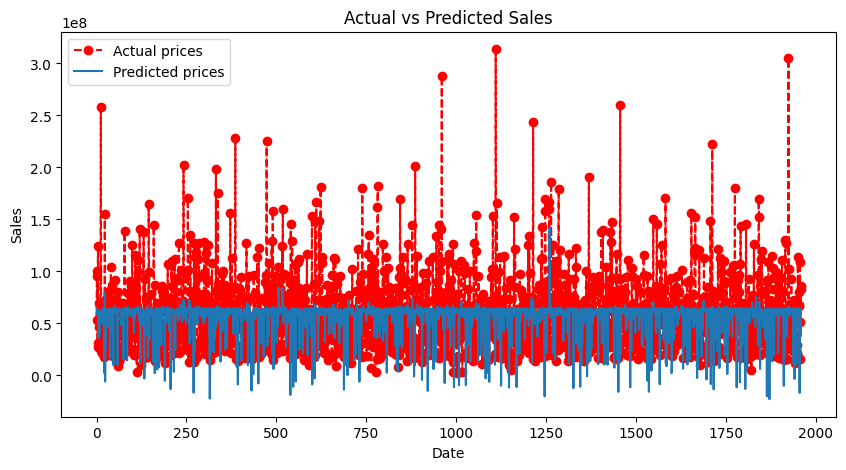

In [46]:
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual prices", marker='o', linestyle='dashed', color='Red')
plt.plot(y_pred, label="Predicted prices"),
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()